In [1]:
from helpers import *
import os
print(os.getcwd())
import time

/home/workspace/2022.micro.artifact/experiments-matmul2


In [2]:
verbose = True
architecture = "/home/workspace/2022.micro.artifact/experiments-matmul2/arch.yaml"
architecture2 = "/home/workspace/2022.micro.artifact/experiments-matmul2/arch3.yaml"
component = "/home/workspace/2022.micro.artifact/experiments-matmul2/compound_components.yaml"
ERT_output_path = "ERT.yaml"
ART_output_path = "ART.yaml"
sparse_opts = "/home/workspace/2022.micro.artifact/experiments-matmul2/SI-SW.yaml"
workload = "/home/workspace/2022.micro.artifact/experiments-matmul2/matmul2.yaml"
mapper = "/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml"
mapping = "/home/workspace/2022.micro.artifact/experiments-matmul2/timeloop_temp/timeloop-mapper.map.yaml"
constraints = "/home/workspace/2022.micro.artifact/experiments-matmul2/constraints.yaml"

In [3]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture2,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

Running Accelergy command: accelergy /home/workspace/2022.micro.artifact/experiments-matmul2/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/compound_components.yaml -o accelergy_temp -v 1
    _                _                      
   / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
  / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
 / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
/_/   \_\___\___\___|_|\___|_|  \__, |\__, |
                                |___/ |___/ 

Info: generating outputs according to the following specified output flags... 
 Please use the -f flag to update the preference (default to all output files) 
{'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
Info: config file located: /home/workspace/.config/accelergy/accelergy_config.yaml 
config file content: 
 {'version': 0.3, 'compound_components': [], 'estimator_plug_ins': ['/usr/local/share/accelergy/estimation_plug_ins'], 'primitive_components': ['/usr/loca

In [4]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]
print(mapping_path)

['timeloop-mapper', '/home/workspace/2022.micro.artifact/experiments-matmul2/arch3.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/matmul2.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/SI-SW.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/constraints.yaml', '/home/workspace/2022.micro.artifact/experiments-matmul2/mapper.yaml', '--ERT', 'ERT.yaml', '--ART', 'ART.yaml', '-o', 'timeloop_temp']
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

INFO: Banded distribution interpreted density: total nnzs: 16384  density: 6.10352e-05
Problem configuration complete.
Found Accelergy ERT (energy reference table), replacing internal energy model.
Found Accelergy ART (area reference table), replacing internal area model.
Architecture confi

[  0] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 22319.811 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[] N1 
[  0] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 21317.721 | L4[] N256 M8 N8X - L3[I] M256 - L2[W] N2 M4 - L1[O] M2 N4 - L0[O] N1 
[  1] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 22319.811 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[] N1 
[  1] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 21147.278 | L4[] M8 N256 N8X - L3[I] M256 - L2[W] M8 N2 - L1[O] N4 - L0[O] N1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 38186.492 | L4[] M32 N256 M4X - L3[I] N16 M8 - L2[W] M8 - L1[O] N4 M2 - L0[] N1 
[  3] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.001 | pJ/Compute = 37249.461 | L4[] M32 N256 M4X - L3[I] N16 M8 - L2[W] M8 - L1[O] N4 M2 - L0[I] N1 
[  2] Utilization = 0.25 | pJ/Algorithmic-Compute =    0.001 

[  1] STATEMENT: 2500 valid mappings found, terminating search.
[  2] STATEMENT: 2500 valid mappings found, terminating search.
2025-05-06 01:03:14,453 - timeloop_mapper - WARNING - No stats file found
2025-05-06 01:03:14,466 - timeloop_mapper - INFO - Best mapping file found
2025-05-06 01:03:14,469 - timeloop_mapper - WARNING - No energy reference file found




Summary stats for best mapping found by mapper:
  Utilization = 0.25 | pJ/Algorithmic-Compute =    0.000 | pJ/Compute = 4602.201
searched_mapping.yaml


In [5]:
# If you already have mapping
mapping_path = "searched_mapping.yaml"

output_path = run_timeloop(
    arch_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

Running Timeloop:
timeloop-model /home/workspace/2022.micro.artifact/experiments-matmul2/arch3.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/matmul2.yaml searched_mapping.yaml /home/workspace/2022.micro.artifact/experiments-matmul2/SI-SW.yaml --ERT ERT.yaml --ART ART.yaml -o timeloop_output_test_3
Total time:  0.15624356269836426
Timeloop completed successfully.


dict_keys(['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage'])
['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


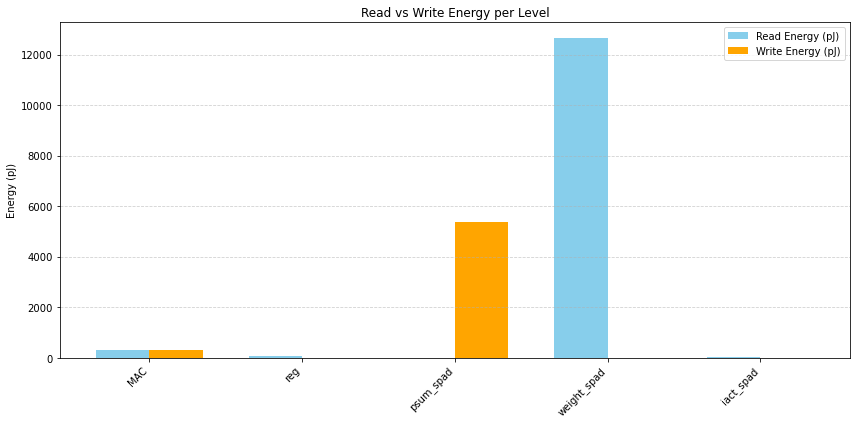

In [6]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
print(output['energy_breakdown_pJ'].keys())
plot_read_write_energy(output["energy_breakdown_pJ"])

['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'BackingStorage']


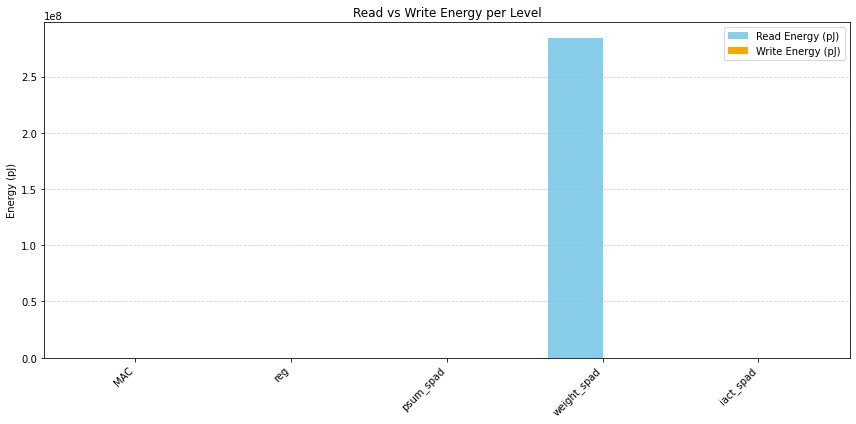

In [7]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])

In [ ]:
# Run Accelergy with the provided arguments
result = run_accelergy(
    architecture_yaml=architecture2,
    component_yaml=component,
    ERT_output_path=ERT_output_path,
    ART_output_path=ART_output_path
)

print(f"Generated ERT file: {result['ERT']}")
print(f"Generated ART file: {result['ART']}")

In [ ]:
# If you want mapper
# Run Timeloop mapper with the provided arguments
result = run_timeloop_mapper(
    architecture_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    ERT=ERT_output_path,
    ART=ART_output_path,
    output_mapping_path="searched_mapping.yaml",
    mapper=mapper,
    constraints=constraints
)

mapping_path = result["best_mapping"]

In [ ]:
# If you already have mapping
# mapping_path = "/home/workspace/2022.micro.artifact/experiments-maggie/custom_mapping.yaml"
output_path = run_timeloop(
    arch_yaml=architecture2,
    workload=workload,
    sparse_opts=sparse_opts,
    mapping=mapping_path,
    constraints=constraints,
    mapper=mapper,
    ert_path=ERT_output_path,
    art_path=ART_output_path,
    output_dir="timeloop_output_test_3"
)

In [ ]:
# Plot output
output = parse_timeloop_stats("timeloop_output_test_3/timeloop-model.map+stats.xml")
plot_read_write_energy(output["energy_breakdown_pJ"])